In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
import pickle as pk
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

In [2]:
files = [elem for elem in os.listdir('./Mat_G/') if 'exp' in elem]

In [3]:
folder = './Mat_G/'
matrixes = {}
for filename in os.listdir(folder)[:5]:
    if filename.endswith('.npy'):
        matrixes[filename] = np.load(folder+filename)

In [4]:
start = time.time()
ens = pd.DataFrame()
for key in matrixes:
    m = matrixes[key]
    DIM_row = m.shape[0]
    DIM_col = m.shape[1]
    freq_m = np.zeros(DIM_col-1)
    div = np.arange(DIM_col-1,0,-1)
    for i in range(DIM_row):
        cc = np.correlate(m[i],m[i],'full')[DIM_col:] / div
        freq_m += cc
    freq_m /= DIM_row
    ens[key] = freq_m
ens.index = np.arange(1,DIM_col)
#print('ensamble mean is=\n',ens.mean(axis=1))
end = time.time()
print('time:',end-start,'sec')

time: 1.8238682746887207 sec


In [5]:
with open('s2_mean.pickle','rb') as f1:
    s2_mean = pk.load(f1) 

In [6]:
m = matrixes['exp_1339_Mat_G.npy']

In [7]:
def s2_calc(m_):
    DIM_row = m_.shape[0]
    DIM_col = m_.shape[1]
    freq_m = np.zeros(DIM_col-1)
    div = np.arange(DIM_col-1,0,-1)
    for i in range(DIM_row):
        cc = np.correlate(m_[i],m_[i],'full')[DIM_col:] / div
        freq_m += cc
    freq_m /= DIM_row
    return freq_m

# Whole

In [8]:
freq_whole = s2_calc(m)

In [9]:
freq_whole

array([0.64522803, 0.62936527, 0.61356966, ..., 0.19594145, 0.        ,
       0.        ])

# Half 

In [10]:
m_dim = m.shape

In [11]:
half_x = int(m_dim[1]/2)
half_y = int(m_dim[0]/2)

In [12]:
m_halves_x = np.array([m[:,:half_x], m[:,half_x:]])
m_halves_y = np.array([m[:half_y,:].T, m[half_y:,:].T])
m_half = np.array([m_halves_x[0], m_halves_x[1], m_halves_y[0], m_halves_y[1]])

In [13]:
col_name = ['half_x_0','half_x_1', 'half_y_0', 'half_y_1']
s2_halves = pd.DataFrame(columns = col_name)

for item, col in zip(m_half,col_name):
    print(item.shape, col)
    s2_halves[col] = s2_calc(item)
s2_halves.index += 1

(1002, 501) half_x_0
(1002, 501) half_x_1
(1002, 501) half_y_0
(1002, 501) half_y_1


In [14]:
s2_halves

,half_x_0,half_x_1,half_y_0,half_y_1
1,0.648559,0.641986,0.642208,0.647399
2,0.632935,0.625987,0.625783,0.631173
3,0.617408,0.610035,0.609404,0.615027
4,0.602094,0.594226,0.593242,0.599114
5,0.587022,0.578722,0.577386,0.583549
...,...,...,...,...
496,0.308782,0.297804,0.525549,0.505389
497,0.289671,0.276697,0.491018,0.479541
498,0.256487,0.244844,0.437458,0.430805
499,0.189122,0.183633,0.327345,0.325349


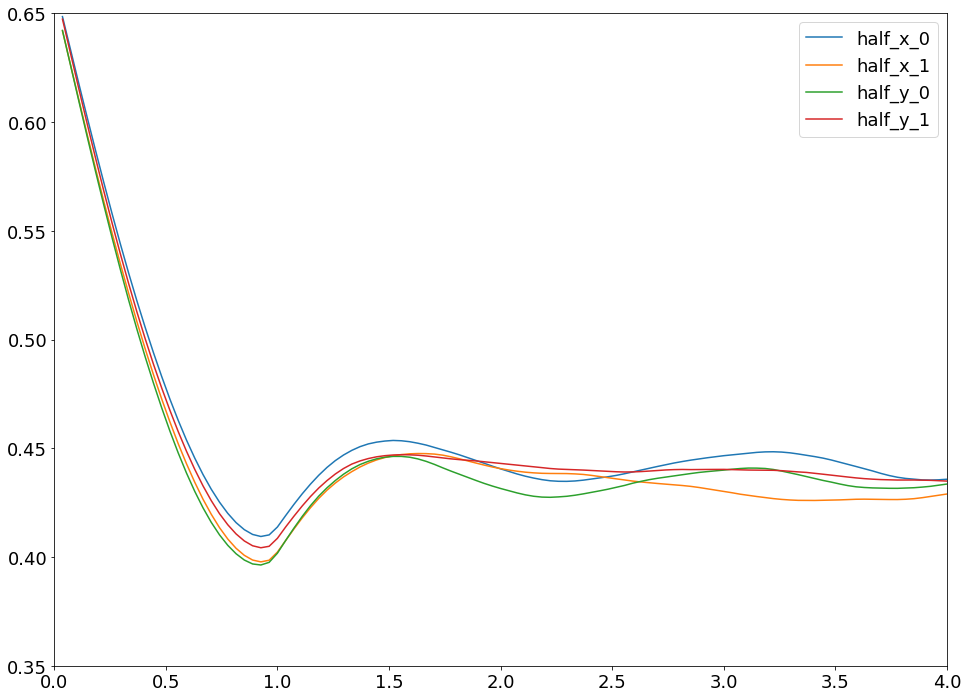

In [15]:
D = 27
for col in s2_halves.columns:
    plt.plot(s2_halves.index/D, s2_halves[col], label=col)
xRange = plt.xlim((0,4))
yRange = plt.ylim((0.35,0.65))
leg = plt.legend()

# Quarter

In [16]:
def chunks(l, n):
    """Yield n number of striped chunks from list"""
    for i in range(0, n):
        yield l[i::n]
        
        
def chunks_sq(l, n):
    """Yield n number of sequential chunks from list"""
    d, r = divmod(len(l), n)
    for i in range(n):
        si = (d+1)*(i if i < r else r) + d*(0 if i < r else i - r)
        yield l[si:si+(d+1 if i < r else d)]


In [17]:
k=4

In [20]:
col_name = ['half_x_0','half_x_1', 'half_y_0', 'half_y_1']
s2_halves = pd.DataFrame(columns = col_name)

for item, col in zip(m_half,col_name):
    print(item.shape, col)
    s2_halves[col] = s2_calc(item)
s2_halves.index += 1

(1002, 501) half_x_0
(1002, 501) half_x_1
(1002, 501) half_y_0
(1002, 501) half_y_1


In [21]:
A = []
k = 6
for it in np.array_split(m,k):
    for el in np.array_split(it,k,axis=1):
        A.append(el)
A = np.array(A)

In [22]:
def divisions(m_,k):
    A = [] 
    for it in np.array_split(m_,k):
        for el in np.array_split(it,k,axis=1):
            A.append(el)
    A = np.array(A)
    return A

In [23]:
dvs = {}
for k in [2,3,6]:
    dvs[str(k)]= divisions(m,k)

In [24]:
res = {}
for key in dvs:    
    k = int(key)
    col_name = ['p_' + str(i) for i in range(k ** 2)]
    s2_bits = pd.DataFrame(columns=col_name)
    for item, col in zip(dvs[key],col_name):
        print(item.shape, col)
        s2_bits[col] = s2_calc(item)
    s2_bits.index += 1

    res[key] = s2_bits

(501, 501) p_0
(501, 501) p_1
(501, 501) p_2
(501, 501) p_3
(334, 334) p_0
(334, 334) p_1
(334, 334) p_2
(334, 334) p_3
(334, 334) p_4
(334, 334) p_5
(334, 334) p_6
(334, 334) p_7
(334, 334) p_8
(167, 167) p_0
(167, 167) p_1
(167, 167) p_2
(167, 167) p_3
(167, 167) p_4
(167, 167) p_5
(167, 167) p_6
(167, 167) p_7
(167, 167) p_8
(167, 167) p_9
(167, 167) p_10
(167, 167) p_11
(167, 167) p_12
(167, 167) p_13
(167, 167) p_14
(167, 167) p_15
(167, 167) p_16
(167, 167) p_17
(167, 167) p_18
(167, 167) p_19
(167, 167) p_20
(167, 167) p_21
(167, 167) p_22
(167, 167) p_23
(167, 167) p_24
(167, 167) p_25
(167, 167) p_26
(167, 167) p_27
(167, 167) p_28
(167, 167) p_29
(167, 167) p_30
(167, 167) p_31
(167, 167) p_32
(167, 167) p_33
(167, 167) p_34
(167, 167) p_35


In [25]:
import matplotlib.cm as cm

In [26]:
plt.imsave('exp_1339.png', m, cmap=cm.gray)

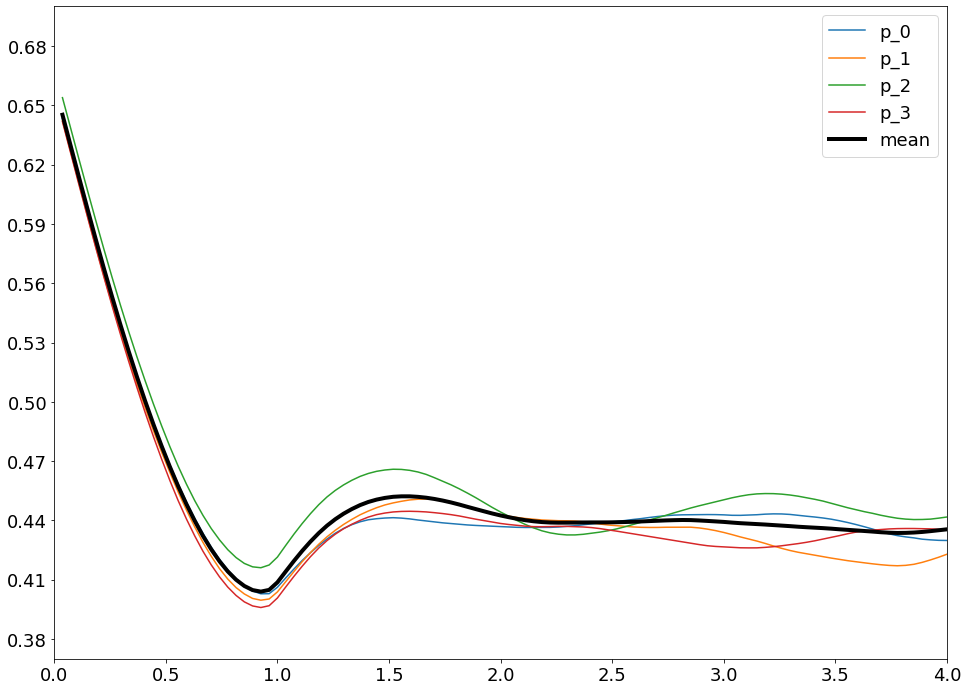

In [27]:
D = 27
i=0
for col in res['2']:
    
    plt.plot(res['2'].index/D, res['2'][col], label=col)
    plt.imsave(col +'.png', dvs['2'][i], cmap=cm.gray)
    i +=1
plt.plot(np.arange(1,len(freq_whole)+1)/D, freq_whole, '-k', label='mean', LineWidth='4')
# plt.plot(res['2'].index/D, res['2'].mean(axis=1), '-.g',  label='mean of parts',  LineWidth='4')

xRange = plt.xlim((0,4))

yticks = plt.yticks(np.arange(0.35,0.7,0.03))
yRange = plt.ylim((0.37,0.7))

leg = plt.legend()
plt.savefig('quart.png',dpi=600)

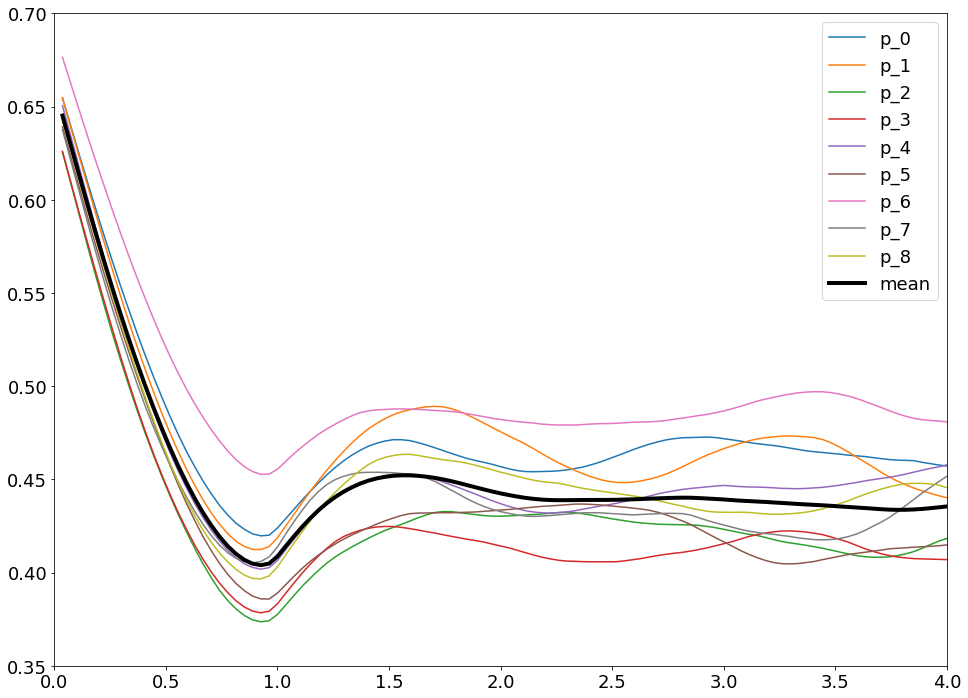

In [28]:
D = 27
for col in res['3']:
    plt.plot(res['3'].index/D, res['3'][col], label=col)

plt.plot(np.arange(1,len(freq_whole)+1)/D, freq_whole, '-k', label='mean', LineWidth='4')
# plt.plot(res['3'].index/D, res['3'].mean(axis=1), '-.g',  label='mean of parts',  LineWidth='4')

xRange = plt.xlim((0,4))
yRange = plt.ylim((0.35,0.7))
leg = plt.legend()
plt.savefig('nith.png',dpi=600)

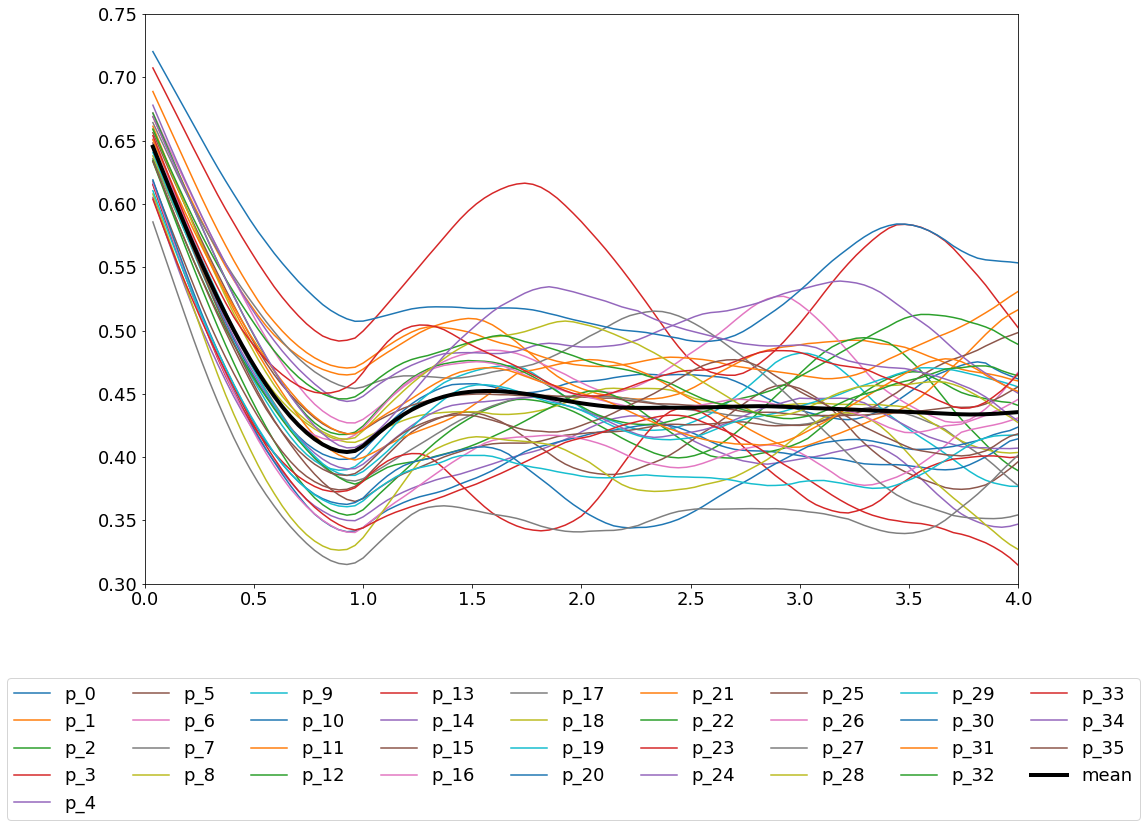

In [30]:
D = 27
for col in res['6']:
    plt.plot(res['6'].index/D, res['6'][col], label=col)

plt.plot(np.arange(1,len(freq_whole)+1)/D, freq_whole, '-k', label='mean', LineWidth='4')
# plt.plot(res['6'].index/D, res['6'].mean(axis=1), '-.g',  label='mean of parts',  LineWidth='4')

xRange = plt.xlim((0,4))
yRange = plt.ylim((0.3,0.75))
leg = plt.legend(bbox_to_anchor=(1.15, -0.15), ncol= 9)
plt.tight_layout()
plt.savefig('36th.png',dpi=600)